In [38]:
# import PID
import simple_pid
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

## Define PID weights

PID controller minimizes error by adjusting a control variable (e.g., power supplied) to a new value determined by a weighted sum of present (P), past (I), and future (D) error values.

In [88]:
# TODO: Set the PID gains/weights below to improve your system's error correction response
kP = 0.0 # weight current errors more
kI = 0.0
kD = 0.0 # minimize or ignore future potential errors 

L = 50 # number of iterations

pid = simple_pid.PID(kP, kI, kD)

pid.SetPoint=0.0
pid.setSampleTime(0.01)

END = L
feedback = 0

feedback_list = []
time_list = []
setpoint_list = []

for i in range(1, END):
    pid.update(feedback)
    output = pid.output
    if pid.SetPoint > 0:
        feedback += (output - (1/i))
    if i>9:
        pid.SetPoint = 1
    time.sleep(0.02)

    feedback_list.append(feedback)
    setpoint_list.append(pid.SetPoint)
    time_list.append(i)

time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
feedback_smooth_eq = interp1d(time_list, feedback_list, kind='quadratic')
feedback_smooth = feedback_smooth_eq(time_smooth)



## How quickly does it converge?

Orange or green is desired value; blue is actual performance.

(0.5, 1.5)

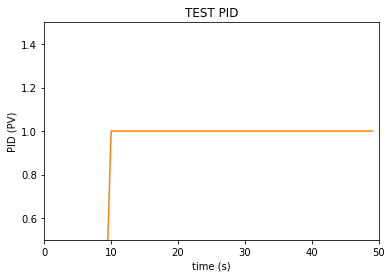

In [89]:
plt.plot(time_smooth, feedback_smooth)
plt.plot(time_list, setpoint_list)
plt.xlim((0, L))
plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
plt.xlabel('time (s)')
plt.ylabel('PID (PV)')
plt.title('TEST PID')

plt.ylim((1-0.5, 1+0.5))

### Try to beat the sample output below:  

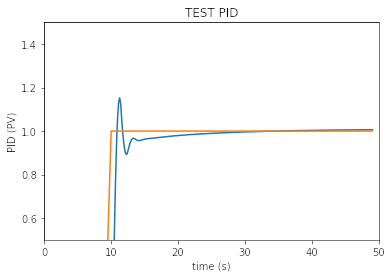

In [79]:
from IPython.display import Image
Image('sample_output.png')

**Question:** When trying to beat this sample output, what does "better" output look like (i.e., smoother, quicker rise, less overshoot, faster settle time, etc.) and why do you consider it better?  

*Note: This answer can be very situation-specific, so provide context for your answer. I.e., is your system a drone, a car, an A/C system, or something else? And why is your output better for your specific system?*

ANSWER: